## **Random Forest**

In [61]:
"""
What is Random Forest?
Random Forest is an Ensemble Learning algorithm that combines multiple Decision Trees.
Each tree is trained on different random samples of the data and features.
All trees make independent predictions, and the final result is decided by
majority vote (for classification) or average (for regression).


1. Random Sampling of Data (Bootstrapping)
Each Decision Tree in the forest is trained on a **random sample of the dataset**.
- The sample size is **equal to the total number of rows** in the dataset.
- The sampling is done **with replacement**, meaning the same row can appear
  more than once in a tree's training data, while some rows might not appear at all.

Example:
If the dataset has 100 rows:
- Each tree will also get 100 rows, but randomly picked.
- Some rows may repeat, and some may be missing.

This technique makes every tree slightly different and helps prevent overfitting.

Meaning of "with replacement":
It means once a data row is picked for the sample, it is *not removed* from the dataset.
So, it can be chosen again — hence duplicates are allowed.


2. Random Sampling of Features (Columns)
When splitting a node inside a tree, Random Forest does not use all features.
Instead, it randomly selects a few features from the total and picks the best split among them.

Example:
    Total features = [Age, ChestPain, Cholesterol, BloodPressure]
    Tree 1 might consider → [Age, Cholesterol]
    Tree 2 might consider → [ChestPain, BloodPressure]

In sklearn, this behavior is controlled by:
    RandomForestClassifier(max_features='sqrt')

If there are 9 total features, each split will randomly consider √9 = 3 features.


3. Training Phase (Learning Rules)
Each tree uses its own random rows and random feature subsets to learn rules.

Example:
    Tree 1 learns:
        if Age < 42:
            if Cholesterol < 210 → predict 0
            else → predict 1
        else:
            if ChestPain == severe → predict 1
            else → predict 0


4. Internal Testing: Out-of-Bag (OOB) Evaluation
Random Forest has a special self-testing mechanism called **Out-of-Bag (OOB) testing**.

Since each tree is trained on random samples (with replacement),
some rows are *not* included in that tree's training data.
These unused rows are called **Out-of-Bag samples**.

- Each tree tests its performance on its own OOB samples.
- Random Forest then averages all trees’ OOB results to estimate the overall model accuracy.

This means Random Forest automatically performs internal testing,
   even without manually splitting data into train/test sets.

So:
- Each **tree** performs testing using its **own OOB samples**.
- The **Random Forest** model then combines all these results for final OOB accuracy.


5. Prediction Phase (Voting / Averaging)
When a new data point comes:
- Each tree gives its own prediction.
- For classification → final output = majority vote
- For regression → final output = average of all tree predictions


6. Why Randomness Helps
- Reduces overfitting by creating diverse trees.
- Improves accuracy through averaging.
- Handles missing values and noisy data effectively.

Summary
1. Each tree gets random rows (same size as dataset, with replacement).
2. Each split uses random features.
3. Each tree tests itself using OOB samples.
4. All trees vote -> final output.
5. Randomness ensures diversity -> better generalization.
"""

'\nWhat is Random Forest?\nRandom Forest is an Ensemble Learning algorithm that combines multiple Decision Trees.\nEach tree is trained on different random samples of the data and features.\nAll trees make independent predictions, and the final result is decided by\nmajority vote (for classification) or average (for regression).\n\n\n1. Random Sampling of Data (Bootstrapping)\nEach Decision Tree in the forest is trained on a **random sample of the dataset**.\n- The sample size is **equal to the total number of rows** in the dataset.\n- The sampling is done **with replacement**, meaning the same row can appear\n  more than once in a tree\'s training data, while some rows might not appear at all.\n\nExample:\nIf the dataset has 100 rows:\n- Each tree will also get 100 rows, but randomly picked.\n- Some rows may repeat, and some may be missing.\n\nThis technique makes every tree slightly different and helps prevent overfitting.\n\nMeaning of "with replacement":\nIt means once a data row i

In [62]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [63]:
data = pd.read_csv('https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [64]:
# Split features (X) and target (y)
X = data.drop("target", axis=1)   # Drop the target column -> remaining columns are features
y = data["target"]                # Target column (output values)

In [65]:
# Split dataset into training and testing parts
# 80% data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# Create and train Random Forest model
# n_estimators = number of trees in the forest
# random_state = fixed for reproducibility
# min_samples_leaf = minimum samples required in a leaf node
model = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_leaf=5)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [67]:
# Step 6: Make predictions using the trained Random Forest model
# Note: This uses the original model (not the grid-searched one)
y_pred = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.8852459016393442


## Comparing performance with Decision Tree

In [68]:
model_decision_tree = DecisionTreeClassifier(random_state=42)  # Create Decision Tree model 
model_decision_tree.fit(X_train, y_train)                      # Train the Decision Tree
print("Decision Tree Accuracy: ", model_decision_tree.score(X_test, y_test))
# Usually, Random Forest performs better since it combines many trees (ensemble learning)

Decision Tree Accuracy:  0.7540983606557377


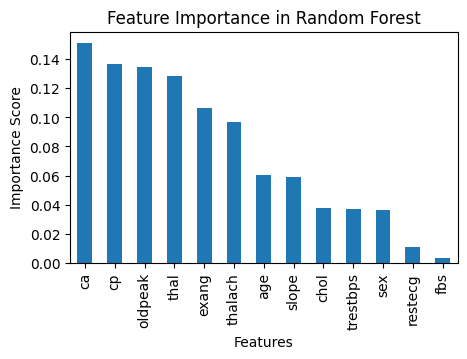

In [69]:
# Check which features have more influence on the predictions 
importances = pd.Series(model.feature_importances_ ,index=X.columns)

# Sort the importance values in descending order and plot them
importances.sort_values(ascending=False).plot(kind="bar", figsize=(5,3))
plt.title("Feature Importance in Random Forest")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()

- Ensemble Learning -> Combining multiple weak models (trees) to make a strong model.
- Random Forest trains each tree on a random sample (~2/3 of the data).
- The remaining ~1/3 data (not used for that tree) is called "Out of Bag" (OOB) data.
- Each tree can test itself on this unseen data automatically.
- When averaged across all trees, this gives the OOB score → an internal validation accuracy.

In [ ]:
# OOB scoring (Out-of-Bag) --> Internal testing of model
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)
print("OOB Score: ", rf.oob_score_)

OOB Score:  0.8347107438016529
